**PROYEK FINAL**

Melakukan EDA pada dataset penyakit Kyphosis, Kyphosis ialah penyakit kelengkungan tulang belakang cembung yng berlebihan secara tidak normal.

Dataset terdiri dari 81 baris dan 4 kolom data anak-anak yang menjalani oprasi tulang belakang korektif.

- INPUT: 1 "Age" dalam bulan, 2 "Number" jumlah vertebra yang terlibat, 3 "Start" jumlah vertebra pertama atau paling atas yang dioperasi

- OUTPUT: "Kyphosis" dengan dua unique values yakni 'absent' dan 'present' yang menunujukan apakah ada Kyphosis setelah operasi


In [21]:
#import file
import pandas as pd
pd.options.display.max_columns = None
pd.options.display.max_rows = None

khyphosis_df = pd.read_csv('kyphosis.csv')

In [2]:
#melakukan Explanatory Data Analysis
khyphosis_df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


In [3]:
khyphosis_df.tail()

,Kyphosis,Age,Number,Start
76,present,157,3,13
77,absent,26,7,13
78,absent,120,2,13
79,present,42,7,6
80,absent,36,4,13


In [4]:
khyphosis_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Kyphosis  81 non-null     object
 1   Age       81 non-null     int64 
 2   Number    81 non-null     int64 
 3   Start     81 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.7+ KB


In [5]:
khyphosis_df.isnull().sum() #tiak ada data yg hialng / na

Kyphosis    0
Age         0
Number      0
Start       0
dtype: int64

In [22]:
#menghitung usia rata-rata, minimum, dan maximum dalam tahun dengan dua metode
#a) menghitung usia rata-rata dengan mengubah data Age dalam tahun terlebih dahulu
def age_in_year(month): #fungsi untuk mengubah umur dari bulan menjadi tahun
  return month/12

khyphosis_df['Age'] = khyphosis_df['Age'].apply(age_in_year) #menerapkan fungsi kedalam data kolom Age
khyphosis_df.head() #umur sudah dalam satuan tahun

,Kyphosis,Age,Number,Start
0,absent,5.916667,3,5
1,absent,13.166667,3,14
2,present,10.666667,4,5
3,absent,0.166667,5,1
4,absent,0.083333,4,15


In [7]:
khyphosis_df['Age'].mean() #rata-rata umur 6,9 tahun

6.971193415637861

In [8]:
#b) menghitung usia minimum
khyphosis_df[khyphosis_df['Age'] == khyphosis_df['Age'].min()]

,Kyphosis,Age,Number,Start
4,absent,0.083333,4,15
5,absent,0.083333,2,16
13,absent,0.083333,4,12
15,absent,0.083333,3,16
36,absent,0.083333,3,9


In [9]:
#c) menghitung usia maximum
khyphosis_df[khyphosis_df['Age'] == khyphosis_df['Age'].max()]

,Kyphosis,Age,Number,Start
73,absent,17.166667,4,10


<ipython-input-10-c1b95722b8bb>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = khyphosis_df.corr()


<Axes: >

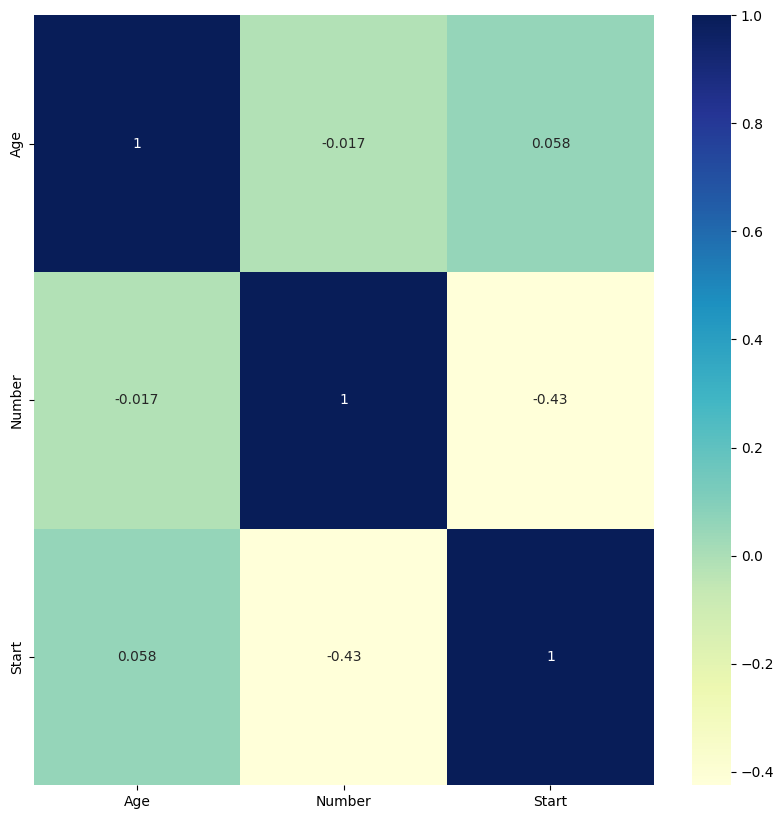

In [10]:
#plot matriks korelasi
import matplotlib.pyplot as plt
import seaborn as sns
correlations = khyphosis_df.corr()
f, ax = plt.subplots(figsize = (10,10))
sns.heatmap(correlations, annot = True, cmap = "YlGnBu")

In [11]:
##mengubah tipe data kolom "Age" dari int64 menjadi float64
#melihat tipe data
khyphosis_df.dtypes

Kyphosis     object
Age         float64
Number        int64
Start         int64
dtype: object

**Karena "Age" sudah dalam float64 maka akan mencoba mengubah kolom "Number"**

khyphosis_df["Number"] = khyphosis_df["Number"].astype("float")

In [13]:
#mendefinisikan fungsi untuk mengubah umur dari bulan ke tahun sudah dilakukan di awal

#mengetahui ciri-ciri paling tua dan paling muda pada data
khyphosis_df.describe()

,Age,Number,Start
count,81.000000,81.000000,81.000000
mean,6.971193,4.049383,11.493827
std,4.842021,1.619423,4.883962
min,0.083333,2.000000,1.000000
25%,2.166667,3.000000,9.000000
50%,7.250000,4.000000,13.000000
75%,10.833333,5.000000,16.000000
max,17.166667,10.000000,18.000000


**Dengan melihat summary data pada kolom "Age" dapat dilihat bahwa usia paling tua yaitu 17 tahun, sedangkan usia paling muda yaitu 0,08 tahun**

In [14]:
#melakukan penskalaan kolom "Age" dalam bulan menggunakan standarisasi dan normalisasi
khyphosis_df = pd.read_csv("kyphosis.csv")
khyphosis_df

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15
5,absent,1,2,16
6,absent,61,2,17
7,absent,37,3,16
8,absent,113,2,16
9,present,59,6,12


In [ ]:
#standarisasi skala
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
khyphosis_df['Age'] = scaler.fit_transform(khyphosis_df['Age'].values.reshape(-1,1))
khyphosis_df['Age']

In [16]:
#sanity check
khyphosis_df.describe()

,Age,Number,Start
count,81.000000,81.000000,81.000000
mean,0.403192,4.049383,11.493827
std,0.283435,1.619423,4.883962
min,0.000000,2.000000,1.000000
25%,0.121951,3.000000,9.000000
50%,0.419512,4.000000,13.000000
75%,0.629268,5.000000,16.000000
max,1.000000,10.000000,18.000000


In [ ]:
#normalisasi skala menggunakan standarisasi (mengubah nilai rata-rata menjadi 0, dan std 1)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
khyphosis_df['Age'] = scaler.fit_transform(khyphosis_df['Age'].values.reshape(-1,1))
khyphosis_df['Age']

In [18]:
#sanity check
khyphosis_df.describe()

,Age,Number,Start
count,8.100000e+01,81.000000,81.000000
mean,1.329526e-16,4.049383,11.493827
std,1.006231e+00,1.619423,4.883962
min,-1.431381e+00,2.000000,1.000000
25%,-9.984388e-01,3.000000,9.000000
50%,5.793938e-02,4.000000,13.000000
75%,8.025994e-01,5.000000,16.000000
max,2.118743e+00,10.000000,18.000000


**Kesimpulan** :

Dapat dilihat bahwa pada kolom Age nilai mean berubah dari 83.654321	menjadi 1.000571e-16 atau 0,0000000000000001
dan nilai std berubah dari 58.104251 menjadi 1.006231e+00 atau 1